# Árboles de Regresión EAD TC Particulares

**Descripción:** En este notebook se obtienen los árboles de regresión para todos los segmentos pertenecientes a TC Particulares.

## Inicio Spark

**Descripción:** En esta parte se inicia la sesión de spark, para poder iniciar una sesión en Spark lo primero es llamar a la clase **SparkSession** desde el paquete **pyspark.sql** para poder utilizar la clase anidada **SparkSession.builder** la cual es el constructor para las sesión. Los parámetros para el inicio de spark son los siguiente:

* **app_Name(string name):** Establece un nombre para la aplicación, que se mostrará en la interfaz web de Spark. Si no se establece un nombre de aplicación, se utilizará un nombre generado aleatoriamente.

* **master("yarn"):** Establece la URL maestra de Spark a la que conectarse.

* **config("spark.sql.crossJoin.enabled", "true"):** Prohíbe los productos cartesianos y se genera una excepción.

* **config('spark.executor.memoryOverhead','2gb'):** Cantidad de memoria fuera del montón que se asignará por el ejecutor, en MB a menos que se especifique lo contrario.

* **getOrCreate():** Obtiene una sesión SparkSession existente o, si no hay ninguna, crea una nueva según las opciones establecidas en este constructor. 

* **config("spark.driver.memory","10g"):** Cantidad de memoria que se utilizará para el proceso del controlador.

Otras configuración son las siguientes:

* **config('spark.sql.shuffle.partitions','1000'):** Configura el número de particiones que se utilizan al mezclar datos para combinaciones o agregaciones.

* **config("spark.driver.maxResultSize", "5g"):** Límite del tamaño total de los resultados serializados de todas las particiones para cada acción de Spark. Los trabajos se cancelarán si el tamaño total supera este límite. Tener un límite alto puede causar errores de memoria insuficiente en el controlador.

* **config('spark.executor.cores','1'):** La cantidad de núcleos que se usarán en cada ejecutor.

* **config("spark.kryoserializer.buffer.mb","128"):** Tamaño inicial del buffer se serialización de Kryo, en MB, si no se especifica es en KB.

* **config("spark.executor.memory","10g"):** Cantidad de memoria a usar por los ejecutores.

In [1]:
from pyspark.sql import *

spark = SparkSession.builder\
        .master('yarn')\
        .appName("Estabilidad_Validacion_Variables")\
        .config("spark.kryoserializer.buffer.mb","128")\
        .config("spark.driver.memory","10g")\
        .config('spark.executor.memoryOverhead','2gb') \
        .config('spark.driver.maxResultSize','4g') \
        .config('spark.driver.memoryOverhead','2gb') \
        .config("spark.executor.memory","10g")\
        .getOrCreate()

22/03/18 14:32:38 WARN spark.SparkConf: The configuration key 'spark.kryoserializer.buffer.mb' has been deprecated as of Spark 1.4 and may be removed in the future. Please use spark.kryoserializer.buffer instead. The default value for spark.kryoserializer.buffer.mb was previously specified as '0.064'. Fractional values are no longer accepted. To specify the equivalent now, one may use '64k'.
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/18 14:32:39 WARN spark.SparkConf: The configuration key 'spark.kryoserializer.buffer.mb' has been deprecated as of Spark 1.4 and may be removed in the future. Please use spark.kryoserializer.buffer instead. The default value for spark.kryoserializer.buffer.mb was previously specified as '0.064'. Fractional values are no longer accepted. To specify the equivalent now, one may use '64k'.
22/03/18 14:32:39 WARN spark.SparkConf: The configuration key 'spark.kryoseriali

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.font_manager import FontProperties as rcParams

## Librerías

**Descripción:** Se llaman a las librerías de PySpark y Python necesarias para ejecutar los códigos, también se define la donde se van a guardar las tablas en el lago.

* **Librería del lago para provisiones:** gmetyprov

* **pyspark.sql.functions:** Contiene una colección de funciones integradas disponibles para DataFrame.

* **pyspark.sql.types:** Contiene lista de tipos de datos disponibles.

* **pyspark.sql import Window:** Es para trabajar con funciones de ventana. Una función window calcula un valor de retorno para cada fila de entrada de una tabla en función de un grupo de filas.

* **math:** Contiene una colección de funciones matemáticas.

* **pyspark.sql import SQLContext:**  Se utiliza para crear DataFrame, registrar DataFrame como tablas, ejecutar SQL sobre tablas, almacenar tablas en caché y leer archivos del parquet.

* **pyspark.ml.regression import GeneralizedLinearRegression:** Ajusta un modelo lineal generalizado especificado dada una descripción simbólica del predictor lineal (función de enlace) y una descripción de la distribución de la distribución de errores (familia). Soporta "gaussiano", "binomial", "poisson", "gamma" y "tweedie" como familia. Las funciones de enlace válidas para cada familia se enumeran a continuación. La primera función de enlace de cada familia es la predeterminada.

    * "gaussian" -> "identity", "log", "inverse"
    * "binomial" -> "logit", "probit", "cloglog"
    * "poisson" -> "log", "identity", "sqrt"
    * "gamma" -> "inverse", "identity", "log"
    * "tweedie" -> "linkPower", por defecto es 1 - variancePower

* **pyspark.ml.evaluation import BinaryClassificationEvaluator:** Evaluador para clasificación binaria, que espera dos columnas de entrada: rawPrediction y label. La columna rawPrediction puede ser de tipo double (predicción binaria 0/1 o probabilidad de etiqueta 1) o de tipo vector (vector de longitud 2 de predicciones, puntuaciones o probabilidades de etiqueta).

* **pyspark.ml.stat import ChiSquareTest:** Realiza la prueba de independencia de Pearson para cada función con respecto a la etiqueta. Para cada característica, los pares ( característica, etiqueta) se convierten en una matriz de contingencia para la cual se calcula el estadístico Chi-cuadrado. Todos los valores de características y etiquetas deben ser categóricos. La hipótesis nula es que la ocurrencia de los resultados es estadísticamente independiente.

* **pyspark.ml.feature import VectorAssembler:** Transformador de características que fusiona varias columnas en una columna vectorial.

* **time:** Contiene funciones para obtener la fecha y/o hora de distintos tipos de relojes.

In [4]:
## Librería del lago para Provisiones
work_path = "gmetyprov."

## Librerías PySpark y Python

## Importar librerias:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

## Librerias funciones spark
from pyspark.sql.functions import (max as ps_max, min as ps_min, count as ps_count, when, desc, col, lit, countDistinct, sqrt as ps_sqrt, ceil, row_number,
                                   monotonically_increasing_id, lead, sum as ps_sum, log as ps_log, abs as ps_abs, round as ps_round, rank, 
                                   stddev as ps_stddev, mean as ps_mean)

In [5]:

######################################### Grafica Árbol #######################################################

def prof_Tree(Tree):
    """
    -> Parámetros : Tree : Árbol
    -> return : Profundidad del árbol y número de hojas
    """
    if type(Tree)!=dict:
        return 1,1
    profundidad = [] # Creamos lista vacía "profundidad" que almacene recursivamente la profundidad de cada rama
    hojas = 0 # Inicializamos las hojas en 0
    claves = list(Tree.keys())
    # Creamos if utilizado en la recursividad
    if len(claves) == 1:
        Tree = Tree[claves[0]]
    for key in Tree.keys(): # pasa por cada rama del árbol
        prof_sub = prof_Tree(Tree[key])
        profundidad.append(1+prof_sub[0])
        hojas += prof_sub[1]
    return max(profundidad), hojas

def plotArrow(cont,xy1,xy2,graf):
    """
    Dibuja flecha con una descripción de texto en el centro
    -> parámetros : cont : contenido del texto
                     xy1 : coordenadas inicio flecha
                     xy2 : coordenas fin flecha
                     graf : objeto gráfico en donde se dibuja la flecha
    """
    
    # Dibujamos flecha
    graf.arrow(xy1[0],xy1[1],xy2[0]-xy1[0],xy2[1]-xy1[1], length_includes_head = True,
               head_width = 0.15, head_starts_at_zero = True, shape = 'full', width= 0.05, head_length = 0.5, fc ='r', ec = 'dimgray')
    # Creammos coordenadas para incluir texto
    tx = (xy1[0] + xy2[0])/2
    ty = (xy1[1] + xy2[1])/2
    
    # dibujamos texto
    graf.annotate(cont,size=10,xy=(tx,ty),xytext=(-5,5),textcoords='offset points',
                bbox=dict(boxstyle='square', ec=(1,0.5,0.5), fc=(1,0.8,0.8)),
                )

    
def plotNode(cont,xy,graf,mod = 'any'):
    """
    Dibuja nodo
    -> Parámetros : cont : contenido del nodo
                    xy : coordenadas del nodo
                    graf : objeto gráfico donde se pondrá el nodo
                    mod : Determina color
    """

    # Definimos colores según lo ingresado
    if mod == 'leaf':
        color = 'whitesmoke'
    else:
        color = 'silver'
    # Graficamos
    graf.text(xy[0],xy[1],cont,size=18,ha='center',va='center',bbox=dict(boxstyle='round',ec="grey",fc=color),
             )
    
def plotTree(Tree,figxsize,figysize,cont,Name):
    def plotAll(subTree,profundidad,leafnum):
        if type(subTree) != dict:
            x = leafnum * xsize
            y = ylen - profundidad * ysize 
            plotNode(subTree,(x,y),ax,'leaf')
            return x,y,leafnum +1
        key = list(subTree.keys())
        if len(key) != 1:
            raise TypeError('árbol sin diccionario')
            
        xlist = []
        ylist = []
        valor_key = subTree[key[0]]
        
        for k in valor_key:
            res = plotAll(valor_key[k],profundidad+1,leafnum)
            leafnum = res[2]
            xlist.append(res[0])
            ylist.append(res[1])
        x = sum(xlist)/len(xlist)
        y = ylen - profundidad*3
        plotNode(key[0],(x,y),ax)
        
        i = 0
        for k in valor_key:
            plotArrow(k,(x,y),(xlist[i],ylist[i]),ax)
            i+=1
        return x,y,leafnum
    
    xsize,ysize = 4,3    
    fig = plt.figure(figsize = (figxsize,figysize))
    axprops = dict(xticks=[],yticks=[])
    ax = fig.add_subplot(111,frameon=False,**axprops)
    profundidad, hoja = prof_Tree(Tree)
    xlen,ylen = 4*(hoja+1),3*(profundidad+1)
    ax.set_ylim(0,ylen)
    plotAll(Tree,1,1)
    #plotInfo(cont,ax)
    plt.show()
    
    # Guardamos gráfico en una carpeta local
    fig.savefig("./Plot_Tree/"+Name+".png")

########################################################################################################################### 

def get_plot_Tree(Tree,df,name, var = ["SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","Disponible_normal"]):
    # Reemplazamos en primer lugar las variables "feature_i" por los mencionados en la variable "var"
    for i in range(len(var)):
        if i == 0:
            Tree_corr = Tree.replace("feature"+" "+str(i),var[i])
        else:
            Tree_corr = Tree_corr.replace("feature"+" "+str(i),var[i])
    # Creamos un vector que obtenga las posiciones de los paréntesis izquierdos y derechos
    l = []
    r = []

    for i in range(len(Tree_corr)):
        if Tree_corr[i] == '(':
            l.append(i)
        elif Tree_corr[i] == ')':
            r.append(i)
        
    # eliminamos el primer elemento de las listas l y r que no contienen información relevante
    if Tree_corr[l[0]+1] == "u" and Tree_corr[l[0]+2] == "i" and Tree_corr[l[0]+3] == "d":
        l.pop(0)
        r.pop(0)
    
    # Capturamos el texto al interior de cada uno de los paréntesis en una lista 

    caract = []

    for i in range(len(l)): # or len(r)
        aux = []
        for j in range(l[i]+1,r[i]):
            aux.append(Tree_corr[j])
        caract.append(''.join(aux))
        
    # Separamos los elementos que nos interesan en el vector de características por medio de el espacio " "
    for i in range(len(caract)):
        caract[i] = caract[i].split(" ")
        
    # Identificamos por lista de tuplas las posiciones de "caract" en donde se abre un if y se cierra un else asociado a cada caracterísitica y 
    # su condición
    if_else = []
    for i in range(len(caract)):
        for j in range(len(caract)):
            if (caract[i][0] == caract[j][0]) and (caract[i][2] == caract[j][2]) and (i<j):
                if_else.append((i,j))
    
    # COMENZAMOS FILTRO DE LOS ELEMENTROS CON LA PROFUNDIDAD QUE NOS IMPORTA
    # Note que si la diferencia de los elementos de la primera tupla es distinta de 1 (no es la tupla (0,1)), significa que de inmediato viene
    # otro if realizando otra apertura (lado izquierdo del árbol). Si esta condición se cumple, debemos capturar el segundo elemento de esta lista

    ie_filt = [if_else[0]] # Rellenamos con el primer elemento que va siempre

    if if_else[0] != (0,1):
        ie_filt.append(if_else[1])
    else:
        ie_filt.append(False)
    
    # Se le agrega "False" para señalar que no existe segunda apertura en el lado izquierdo del árbol, y por lo tanto debemos señalar count inmediato

    # Ahora, verificamos que exista una segunda apertura en el lado derecho del árbol (si existen aperturas luego del término del primer "if").
    # Para esto, buscamos en alguna posición del if_else, el primer elemento de la tupla es igual a if_else[0][1] + 1

    for i in range(len(if_else)):
        if if_else[i][0] == (if_else[0][1] + 1): # buscamos si existe otra apertura
            ie_filt.append(if_else[i])
            break
    #   else:
    #       ie_filt.append(False)

    if len(ie_filt) == 2:
        ie_filt.append(False)
        
    # Revisamos si alguna característica de las segunda aperturas (derecha o izquierda) se repite con el nodo raíz, indicaremos con un False en su 
    # posición del ie_filt para indicar que debemos ingresar inmediatamente el count en la apertura correspondiente

    for i in range(1,3):
        if ie_filt[i] != False:
            if caract[ie_filt[i][0]][0] == caract[0][0]:
                ie_filt[i] = False
            
    # con esto se concluye nuestro filtro.
    
    # COMENZAMOS CONTRUSCCIÓN DEL ÁRBOL CODIFICADO 
    
    # Como conocemos la forma que tendrá el árbol codificado, ensamblaremos de forma artesanal la forma según los casos posibles

    # Guardamos en primer lugar las variables que irán sí o sí dentro del árbol

    car_0 = caract[ie_filt[0][0]][0]
    n_0m = caract[ie_filt[0][0]][1] + " " + caract[ie_filt[0][0]][2]
    n_0M = caract[ie_filt[0][1]][1] + " " + caract[ie_filt[0][1]][2]

    if ie_filt[1] == False and ie_filt[2] == False:
        count_l = df.where(col(car_0) <= float(n_0m.split(" ")[1])).count()
        count_r = df.where(col(car_0) > float(n_0M.split(" ")[1])).count()
        # ahora que tenemos los acumulados se crea el diccionario correspondiente
        cod_Tree = {car_0 : {n_0m : count_l , n_0M : count_r }} 
    elif ie_filt[1] == False:
        car_2 = caract[ie_filt[2][0]][0]
        n_2m = caract[ie_filt[2][0]][1] + " " + caract[ie_filt[2][0]][2]
        n_2M = caract[ie_filt[2][1]][1] + " " + caract[ie_filt[2][1]][2]
        count_l = df.where(col(car_0) <= float(n_0m.split(" ")[1])).count()
        count_rl = df.where((col(car_0) > float(n_0M.split(" ")[1])) & (col(car_2) <= float(n_2m.split(" ")[1]))).count()
        count_rr = df.where((col(car_0) > float(n_0M.split(" ")[1])) & (col(car_2) > float(n_2M.split(" ")[1]))).count()
        # Creamos diccionario
        cod_Tree = {car_0 : {n_0m : count_l, n_0M : {car_2 : {n_2m : count_rl, n_2M : count_rr}}}}
    elif ie_filt[2] == False:
        car_1 = caract[ie_filt[1][0]][0]
        n_1m = caract[ie_filt[1][0]][1] + " " + caract[ie_filt[1][0]][2]
        n_1M = caract[ie_filt[1][1]][1] + " " + caract[ie_filt[1][1]][2]
        count_ll = df.where((col(car_0) <= float(n_0m.split(" ")[1])) & (col(car_1) <= float(n_1m.split(" ")[1]))).count()
        count_lr = df.where((col(car_0) <= float(n_0m.split(" ")[1])) & (col(car_1) > float(n_1M.split(" ")[1]))).count()
        count_r = df.where(col(car_0) > float(n_0M.split(" ")[1])).count()
        # Creamos diccionario
        cod_Tree = {car_0 : {n_0m : {car_1 : {n_1m : count_ll , n_1M : count_lr}} , n_0M : count_r}}
    else:
        car_1 = caract[ie_filt[1][0]][0]
        n_1m = caract[ie_filt[1][0]][1] + " " + caract[ie_filt[1][0]][2]
        n_1M = caract[ie_filt[1][1]][1] + " " + caract[ie_filt[1][1]][2]
        car_2 = caract[ie_filt[2][0]][0]
        n_2m = caract[ie_filt[2][0]][1] + " " + caract[ie_filt[2][0]][2]
        n_2M = caract[ie_filt[2][1]][1] + " " + caract[ie_filt[2][1]][2]
        count_ll = df.where((col(car_0)<=float(n_0m.split(" ")[1])) & (col(car_1) <= float(n_1m.split(" ")[1]))).count()
        count_lr = df.where((col(car_0)<=float(n_0m.split(" ")[1])) & (col(car_1) > float(n_1M.split(" ")[1]))).count()
        count_rl = df.where((col(car_0)>float(n_0M.split(" ")[1])) & (col(car_2) <= float(n_2m.split(" ")[1]))).count()
        count_rr = df.where((col(car_0)>float(n_0M.split(" ")[1])) & (col(car_2) > float(n_2M.split(" ")[1]))).count()
        # Creamos diccionario
        cod_Tree = {car_0 : {n_0m : {car_1 : {n_1m : count_ll , n_1M : count_lr}} , n_0M : {car_2 : {n_2m : count_rl, n_2M : count_rr}}}}
        
    # Finalmente, graficamos el árbol obtenido
    
    plotTree(cod_Tree,10,10,var,name)
    

## Obtención de Árboles

### Personas

In [6]:
## Cargamos los datos
df_pers = spark.table("gmetyprov.BORRAR_MA_TABLA_LC_EAD_PERS_K2_2021")
df_pers2 = df_pers.select("SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","K2","Disponible_normal")
df_pers2.limit(5).toPandas()

,SALDO_NORMAL,LIMITE_NORMAL,porcen_uso,K2,Disponible_normal
0,258964,4968000,0.052126,0.950460,4709036
1,123005,4968000,0.024759,0.951850,4844995
2,0,4968000,0.000000,0.953042,4968000
3,0,4968000,0.000000,0.953042,4968000
4,0,4968000,0.000000,0.953042,4968000


In [7]:
## Revisamos la cantidad de registros de la tabla
df_pers2.count()

65207

In [8]:
## Definimos un vector de ensamblado para que las variables de entrada queden en una sola "features"

vectorizer_pers = VectorAssembler()
vectorizer_pers.setInputCols(["SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","Disponible_normal"])
vectorizer_pers.setOutputCol("features")

VectorAssembler_4927879ad43f1b120610

In [9]:
## Definimos el modelo del árbol de regresión
dt_pers_1 = DecisionTreeRegressor()
dt_pers_2 = DecisionTreeRegressor()
dt_pers_3 = DecisionTreeRegressor()

In [10]:
## Definimos los parámetros del modelo:
## - Predicted_PE: columna que almacenará las predicciones estimadas
## - features: columna que almacena el vector de variables predictoras
## - K2: columna que almacena la predicción real
## - setMaxDepth es para definir la profundidad del árbol, en este caso no se va a fijar una profundidad

dt_pers_1.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(6000)
dt_pers_2.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(13000)
dt_pers_3.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(20000)

DecisionTreeRegressor_4c2893b30844f59afbc5

In [11]:
## Creamos una "pipeline" en la cual hay 2 elementos, un "Vector Assambler" y un modelo " Decision Tree", accesibles mediante
## el atributo "stages"
pipeline_pers_1 = Pipeline(stages=[vectorizer_pers, dt_pers_1])
pipeline_pers_2 = Pipeline(stages=[vectorizer_pers, dt_pers_2])
pipeline_pers_3 = Pipeline(stages=[vectorizer_pers, dt_pers_3])

In [12]:
## Ajustamos el modelo (Ejeuctar)
model_pers_1 = pipeline_pers_1.fit(df_pers2)
model_pers_2 = pipeline_pers_2.fit(df_pers2)
model_pers_3 = pipeline_pers_3.fit(df_pers2)

In [13]:
## Visualizamos los resultados
vectAssembler_pers_1 = model_pers_1.stages[0]
dtModel_pers_1 = model_pers_1.stages[1]
print("Nodos: " + str(dtModel_pers_1.numNodes))
print("Profundidad: " + str(dtModel_pers_1.depth)) ## summary only
print(dtModel_pers_1.toDebugString)

Nodos: 19
Profundidad: 5
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_426c826e5389c1e60bd8) of depth 5 with 19 nodes
  If (feature 0 <= 20374.0)
   If (feature 1 <= 699803.0)
    If (feature 0 <= 719.0)
     Predict: 0.9141319649960873
    Else (feature 0 > 719.0)
     Predict: 0.8781406310186228
   Else (feature 1 > 699803.0)
    Predict: 0.8011654228128532
  Else (feature 0 > 20374.0)
   If (feature 1 <= 1299051.0)
    If (feature 3 <= 119386.5)
     If (feature 2 <= 0.86052634145)
      Predict: 0.7595041759021005
     Else (feature 2 > 0.86052634145)
      Predict: 0.8162846524023195
    Else (feature 3 > 119386.5)
     If (feature 0 <= 260187.5)
      If (feature 0 <= 127997.0)
       Predict: 0.7212201994641243
      Else (feature 0 > 127997.0)
       Predict: 0.6899996170343077
     Else (feature 0 > 260187.5)
      If (feature 3 <= 239226.5)
       Predict: 0.6610583963819684
      Else (feature 3 > 239226.5)
       Predict: 0.6296807505603361
   Else (feature 1 > 129

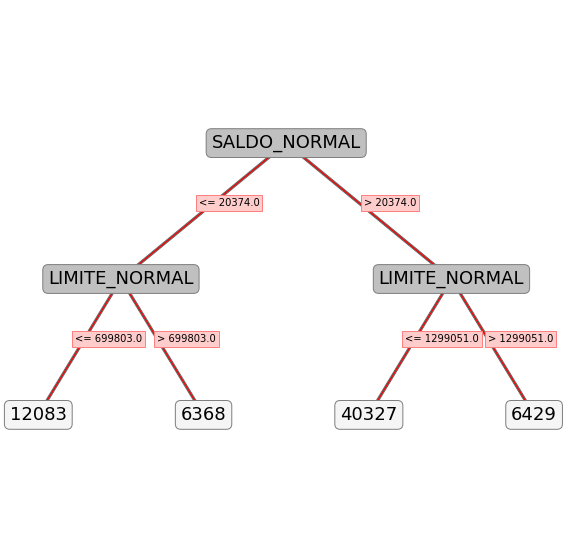

In [14]:
get_plot_Tree(dtModel_pers_1.toDebugString,df_pers2,"Tree_pers_1")

In [26]:
## Visualizamos los resultados
vectAssembler_pers_2 = model_pers_2.stages[0]
dtModel_pers_2 = model_pers_2.stages[1]
print("Nodos: " + str(dtModel_pers_2.numNodes))
print("Profundidad: " + str(dtModel_pers_2.depth)) ## summary only
print(dtModel_pers_2.toDebugString)

Nodos: 7
Profundidad: 3
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4fbea3a1beca3a96001d) of depth 3 with 7 nodes
  If (feature 0 <= 19074.5)
   Predict: 0.8645494849814873
  Else (feature 0 > 19074.5)
   If (feature 3 <= 151886.5)
    Predict: 0.7736603998398903
   Else (feature 3 > 151886.5)
    If (feature 0 <= 337423.0)
     Predict: 0.684499790808477
    Else (feature 0 > 337423.0)
     Predict: 0.5713344538524234



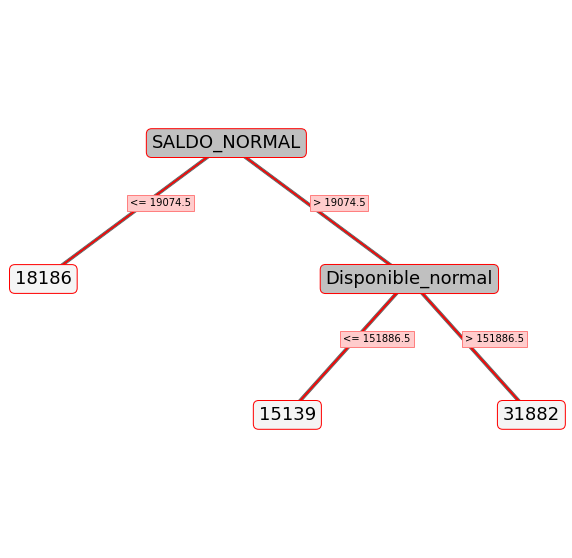

In [ ]:
get_plot_Tree(dtModel_pers_2.toDebugString,df = df_pers2, name="Tree_pers2")

In [29]:
## Visualizamos los resultados
vectAssembler_pers_3 = model_pers_3.stages[0]
dtModel_pers_3 = model_pers_3.stages[1]
print("Nodos: " + str(dtModel_pers_3.numNodes))
print("Profundidad: " + str(dtModel_pers_3.depth)) ## summary only
print(dtModel_pers_3.toDebugString)

Nodos: 5
Profundidad: 2
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_47399da059017ea1928a) of depth 2 with 5 nodes
  If (feature 0 <= 33008.5)
   Predict: 0.8541281353032913
  Else (feature 0 > 33008.5)
   If (feature 3 <= 246846.0)
    Predict: 0.7408420016879486
   Else (feature 3 > 246846.0)
    Predict: 0.6146535988511428



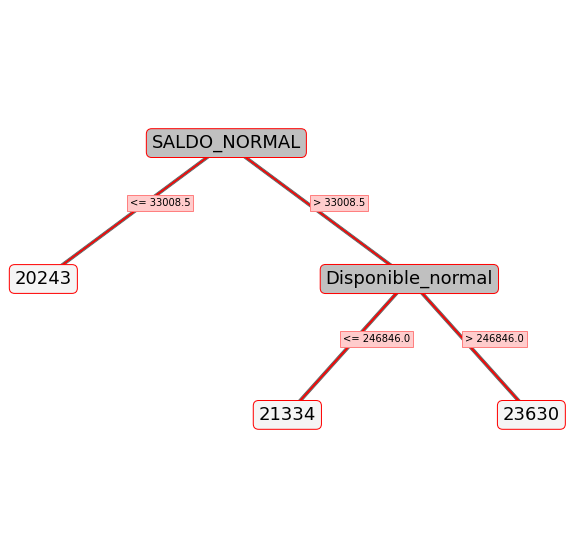

In [30]:
get_plot_Tree(dtModel_pers_3.toDebugString,df=df_pers2,name="Tree_pers3")

### Alto Valor

In [31]:
## Cargamos los datos
df_av = spark.table("gmetyprov.BORRAR_MA_TABLA_LC_EAD_AV_K2_2021")
df_av2 = df_av.select("SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","K2","Disponible_normal")
df_av2.limit(5).toPandas()

,SALDO_NORMAL,LIMITE_NORMAL,porcen_uso,K2,Disponible_normal
0,76089,2300000,0.033082,0.003348,2223911
1,0,2300000,0.000000,0.036320,2300000
2,0,2300000,0.000000,0.036320,2300000
3,0,2300000,0.000000,0.036320,2300000
4,0,2300000,0.000000,0.036320,2300000


In [32]:
## Revisamos la cantidad de registros de la tabla
df_av2.count()

19577

In [33]:
## Definimos un vector de ensamblado para que las variables de entrada queden en una sola "features"

vectorizer_av = VectorAssembler()
vectorizer_av.setInputCols(["SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","Disponible_normal"])
vectorizer_av.setOutputCol("features")

VectorAssembler_44a0935e7874621bf3b2

In [34]:
## Definimos el modelo del árbol de regresión
dt_av_1 = DecisionTreeRegressor()
dt_av_2 = DecisionTreeRegressor()
dt_av_3 = DecisionTreeRegressor()

In [35]:
## Definimos los parámetros del modelo:
## - Predicted_PE: columna que almacenará las predicciones estimadas
## - features: columna que almacena el vector de variables predictoras
## - K2: columna que almacena la predicción real
## - setMaxDepth es para definir la profundidad del árbol, en este caso no se va a fijar una profundidad

dt_av_1.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(2000)
dt_av_2.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(4000)
dt_av_3.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(8000)

DecisionTreeRegressor_4b498b261adc4f9ae58d

In [36]:
## Creamos una "pipeline" en la cual hay 2 elementos, un "Vector Assambler" y un modelo " Decision Tree", accesibles mediante
## el atributo "stages"
pipeline_av_1 = Pipeline(stages=[vectorizer_av, dt_av_1])
pipeline_av_2 = Pipeline(stages=[vectorizer_av, dt_av_2])
pipeline_av_3 = Pipeline(stages=[vectorizer_av, dt_av_3])

In [37]:
## Ajustamos el modelo (Ejeuctar)
model_av_1 = pipeline_av_1.fit(df_av2)
model_av_2 = pipeline_av_2.fit(df_av2)
model_av_3 = pipeline_av_3.fit(df_av2)

In [38]:
## Visualizamos los resultados
vectAssembler_av_1 = model_av_1.stages[0]
dtModel_av_1 = model_av_1.stages[1]
print("Nodos: " + str(dtModel_av_1.numNodes))
print("Profundidad: " + str(dtModel_av_1.depth)) ## summary only
print(dtModel_av_1.toDebugString)

Nodos: 13
Profundidad: 5
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_43dca017a47ed0fac07e) of depth 5 with 13 nodes
  If (feature 1 <= 2877500.0)
   If (feature 0 <= 35604.5)
    If (feature 1 <= 1200121.0)
     Predict: 0.8783524696927768
    Else (feature 1 > 1200121.0)
     Predict: 0.7558266849834849
   Else (feature 0 > 35604.5)
    If (feature 3 <= 159907.0)
     Predict: 0.7979310325666154
    Else (feature 3 > 159907.0)
     If (feature 2 <= 0.5490223493499999)
      If (feature 1 <= 1365500.0)
       Predict: 0.6922320115880446
      Else (feature 1 > 1365500.0)
       Predict: 0.6353572777904256
     Else (feature 2 > 0.5490223493499999)
      Predict: 0.6027686071710536
  Else (feature 1 > 2877500.0)
   Predict: 0.5101186843728689



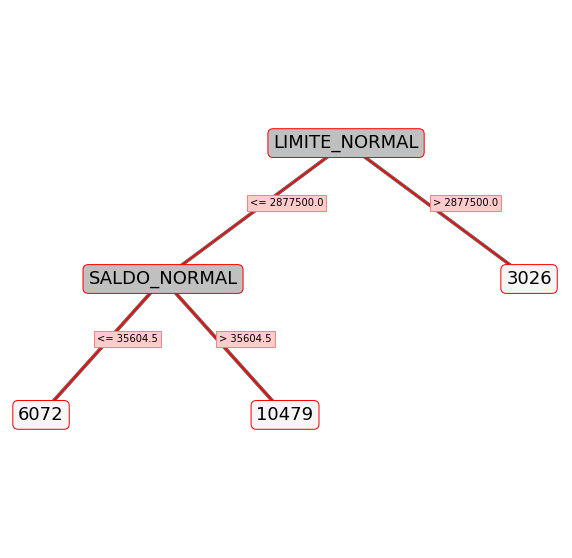

In [39]:
get_plot_Tree(dtModel_av_1.toDebugString,df=df_av2,name="Tree_av1")

In [40]:
## Visualizamos los resultados
vectAssembler_av_2 = model_av_2.stages[0]
dtModel_av_2 = model_av_2.stages[1]
print("Nodos: " + str(dtModel_av_2.numNodes))
print("Profundidad: " + str(dtModel_av_2.depth)) ## summary only
print(dtModel_av_2.toDebugString)

Nodos: 5
Profundidad: 2
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_41938b7d90bcbada9365) of depth 2 with 5 nodes
  If (feature 1 <= 1761846.0)
   If (feature 0 <= 29307.0)
    Predict: 0.8632624792871618
   Else (feature 0 > 29307.0)
    Predict: 0.6908253528634868
  Else (feature 1 > 1761846.0)
   Predict: 0.5931764458261556



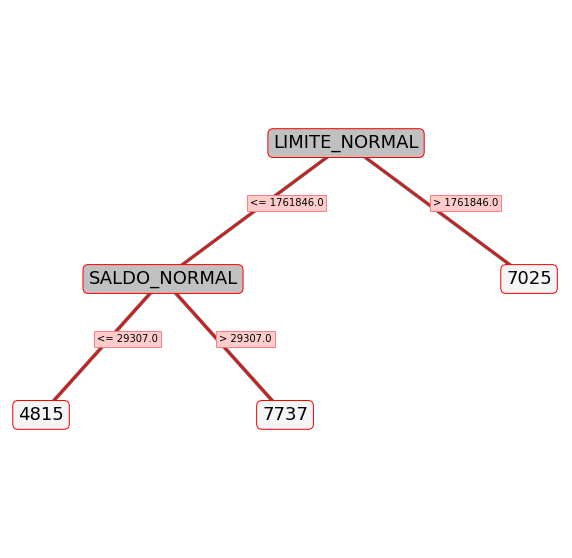

In [41]:
get_plot_Tree(dtModel_av_2.toDebugString,df=df_av2,name="Tree_av2")

In [42]:
## Visualizamos los resultados
vectAssembler_av_3 = model_av_3.stages[0]
dtModel_av_3 = model_av_3.stages[1]
print("Nodos: " + str(dtModel_av_3.numNodes))
print("Profundidad: " + str(dtModel_av_3.depth)) ## summary only
print(dtModel_av_3.toDebugString)

Nodos: 3
Profundidad: 1
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4b498b261adc4f9ae58d) of depth 1 with 3 nodes
  If (feature 1 <= 1148500.0)
   Predict: 0.7905233257057106
  Else (feature 1 > 1148500.0)
   Predict: 0.6324710327239454



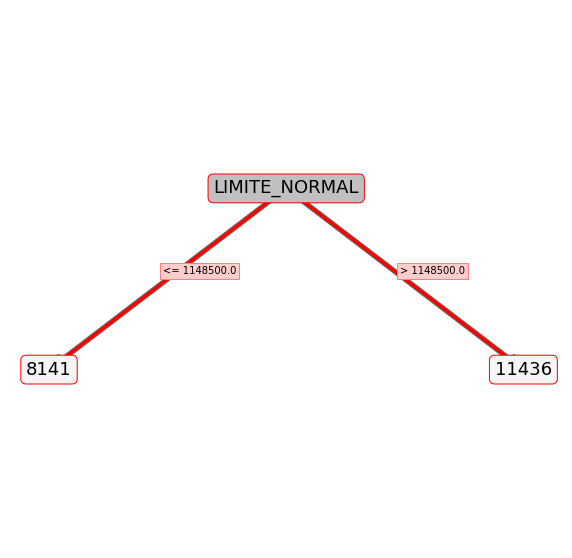

In [44]:
get_plot_Tree(dtModel_av_3.toDebugString,df=df_av2,name="Tree_av3")

### Select

In [45]:
## Cargamos los datos
df_sel = spark.table("gmetyprov.BORRAR_MA_TABLA_LC_EAD_SELECT_K2_2021")
df_sel2 = df_sel.select("SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","K2","Disponible_normal")
df_sel2.limit(5).toPandas()

,SALDO_NORMAL,LIMITE_NORMAL,porcen_uso,K2,Disponible_normal
0,4677724,6000000,0.779621,1.0,1322276
1,0,6000000,0.000000,1.0,6000000
2,0,6000000,0.000000,1.0,6000000
3,0,6000000,0.000000,1.0,6000000
4,19,6000000,0.000003,1.0,5999981


In [46]:
## Revisamos la cantidad de registros de la tabla
df_sel2.count()

14056

In [47]:
## Definimos un vector de ensamblado para que las variables de entrada queden en una sola "features"

vectorizer_sel = VectorAssembler()
vectorizer_sel.setInputCols(["SALDO_NORMAL","LIMITE_NORMAL","porcen_uso","Disponible_normal"])
vectorizer_sel.setOutputCol("features")

VectorAssembler_4d138ddb75b44b48d6a5

In [48]:
## Definimos el modelo del árbol de regresión
dt_sel_1 = DecisionTreeRegressor()
dt_sel_2 = DecisionTreeRegressor()
dt_sel_3 = DecisionTreeRegressor()
dt_sel_4 = DecisionTreeRegressor()

In [49]:
## Definimos los parámetros del modelo:
## - Predicted_PE: columna que almacenará las predicciones estimadas
## - features: columna que almacena el vector de variables predictoras
## - K2: columna que almacena la predicción real
## - setMaxDepth es para definir la profundidad del árbol, en este caso no se va a fijar una profundidad

dt_sel_1.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(1500)
dt_sel_2.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(2000)
dt_sel_3.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(3000)
dt_sel_4.setPredictionCol("Prediction_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("K2").setMinInstancesPerNode(4000)

DecisionTreeRegressor_4e49bd37039620624e11

In [50]:
## Creamos una "pipeline" en la cual hay 2 elementos, un "Vector Assambler" y un modelo " Decision Tree", accesibles mediante
## el atributo "stages"
pipeline_sel_1 = Pipeline(stages=[vectorizer_sel, dt_sel_1])
pipeline_sel_2 = Pipeline(stages=[vectorizer_sel, dt_sel_2])
pipeline_sel_3 = Pipeline(stages=[vectorizer_sel, dt_sel_3])
pipeline_sel_4 = Pipeline(stages=[vectorizer_sel, dt_sel_4])

In [51]:
## Ajustamos el modelo (Ejeuctar)
model_sel_1 = pipeline_sel_1.fit(df_sel2)
model_sel_2 = pipeline_sel_2.fit(df_sel2)
model_sel_3 = pipeline_sel_3.fit(df_sel2)
model_sel_4 = pipeline_sel_4.fit(df_sel2)

In [52]:
## Visualizamos los resultados
vectAssembler_sel_1 = model_sel_1.stages[0]
dtModel_sel_1 = model_sel_1.stages[1]
print("Nodos: " + str(dtModel_sel_1.numNodes))
print("Profundidad: " + str(dtModel_sel_1.depth)) ## summary only
print(dtModel_sel_1.toDebugString)

Nodos: 15
Profundidad: 5
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_456596b1a8802e7fbc0a) of depth 5 with 15 nodes
  If (feature 1 <= 5501500.0)
   If (feature 3 <= 243528.5)
    Predict: 0.8641722573817103
   Else (feature 3 > 243528.5)
    If (feature 2 <= 0.02155316665)
     If (feature 3 <= 2958323.5)
      If (feature 3 <= 1432637.5)
       Predict: 0.8289780084357744
      Else (feature 3 > 1432637.5)
       Predict: 0.7648155508748133
     Else (feature 3 > 2958323.5)
      Predict: 0.6934121984595067
    Else (feature 2 > 0.02155316665)
     If (feature 2 <= 0.66333440745)
      If (feature 2 <= 0.2068801275)
       Predict: 0.6235688348644167
      Else (feature 2 > 0.2068801275)
       Predict: 0.6604370491376579
     Else (feature 2 > 0.66333440745)
      Predict: 0.7599332960777139
  Else (feature 1 > 5501500.0)
   Predict: 0.4632840349193745



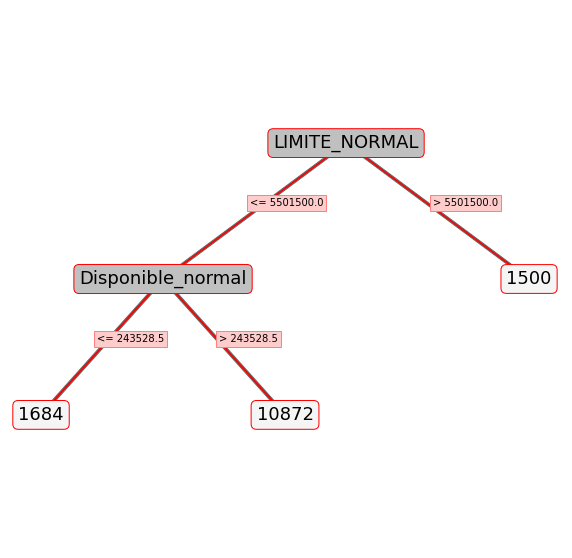

In [53]:
get_plot_Tree(dtModel_sel_1.toDebugString,df=df_sel2,name="Tree_sel1")

In [54]:
## Visualizamos los resultados
vectAssembler_sel_2 = model_sel_2.stages[0]
dtModel_sel_2 = model_sel_2.stages[1]
print("Nodos: " + str(dtModel_sel_2.numNodes))
print("Profundidad: " + str(dtModel_sel_2.depth)) ## summary only
print(dtModel_sel_2.toDebugString)

Nodos: 11
Profundidad: 4
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_494a8d2ee757b1f2980b) of depth 4 with 11 nodes
  If (feature 1 <= 4913700.0)
   If (feature 1 <= 1105500.0)
    If (feature 0 <= 13905.0)
     Predict: 0.8503234455178865
    Else (feature 0 > 13905.0)
     Predict: 0.7642333715188769
   Else (feature 1 > 1105500.0)
    If (feature 2 <= 0.02155316665)
     Predict: 0.7470676305762013
    Else (feature 2 > 0.02155316665)
     If (feature 0 <= 1298689.5)
      Predict: 0.644023205747848
     Else (feature 0 > 1298689.5)
      Predict: 0.7297473979534677
  Else (feature 1 > 4913700.0)
   Predict: 0.5413879766937851



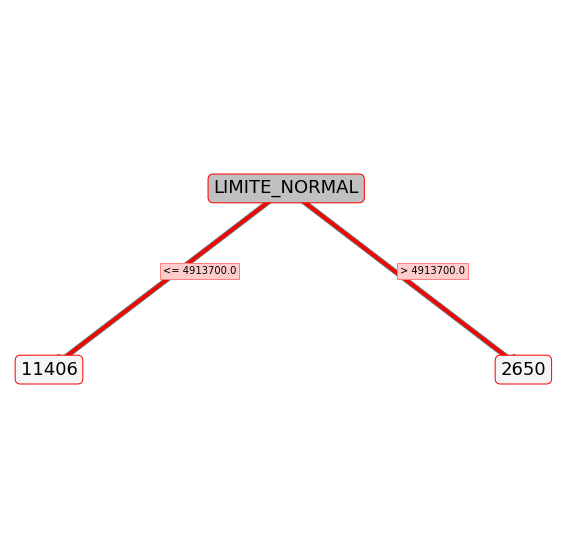

In [55]:
get_plot_Tree(dtModel_sel_2.toDebugString,df=df_sel2,name="Tree_sel2")

In [56]:
## Visualizamos los resultados
vectAssembler_sel_3 = model_sel_3.stages[0]
dtModel_sel_3 = model_sel_3.stages[1]
print("Nodos: " + str(dtModel_sel_3.numNodes))
print("Profundidad: " + str(dtModel_sel_3.depth)) ## summary only
print(dtModel_sel_3.toDebugString)

Nodos: 7
Profundidad: 3
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4f008fdd0603fa3a7861) of depth 3 with 7 nodes
  If (feature 1 <= 4633651.5)
   If (feature 1 <= 1105500.0)
    Predict: 0.8053585594503287
   Else (feature 1 > 1105500.0)
    If (feature 0 <= 243418.0)
     Predict: 0.7251091574891472
    Else (feature 0 > 243418.0)
     Predict: 0.6919306485150406
  Else (feature 1 > 4633651.5)
   Predict: 0.5708203850339413



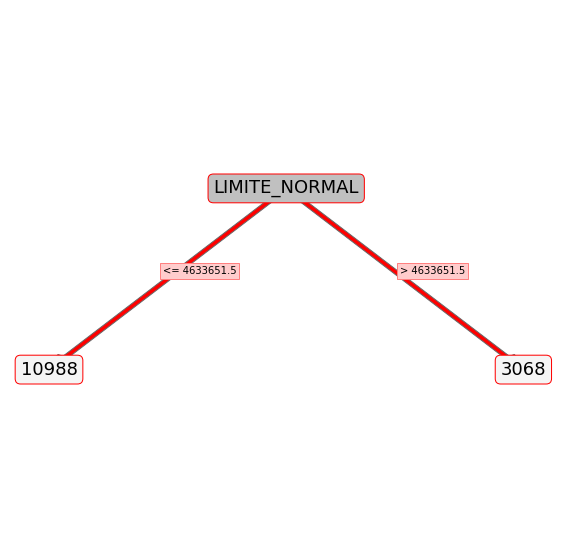

In [57]:
get_plot_Tree(dtModel_sel_3.toDebugString,df=df_sel2,name="Tree_sel3")

In [58]:
## Visualizamos los resultados
vectAssembler_sel_4 = model_sel_4.stages[0]
dtModel_sel_4 = model_sel_4.stages[1]
print("Nodos: " + str(dtModel_sel_4.numNodes))
print("Profundidad: " + str(dtModel_sel_4.depth)) ## summary only
print(dtModel_sel_4.toDebugString)

Nodos: 5
Profundidad: 2
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4e49bd37039620624e11) of depth 2 with 5 nodes
  If (feature 1 <= 3669000.0)
   If (feature 1 <= 1105500.0)
    Predict: 0.8053585594503287
   Else (feature 1 > 1105500.0)
    Predict: 0.7081758262868885
  Else (feature 1 > 3669000.0)
   Predict: 0.6067205997085409



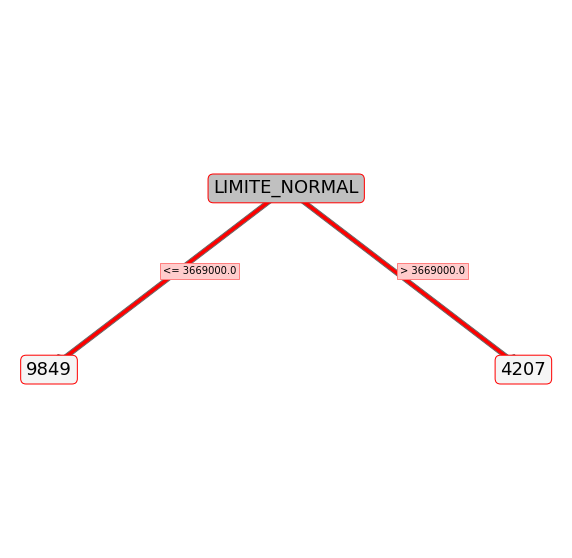

In [59]:
get_plot_Tree(dtModel_sel_4.toDebugString,df=df_sel2,name="Tree_sel4")

## Finaliza Sesión Spark

In [60]:
## Detenemos la sesión de Spark
spark.stop()